HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, Tugas teman-teman  adalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian kalian perlu menyarankan negara mana saja  yang paling perlu menjadi fokus CEO.

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib.patches import Circle
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Data_Negara_HELP.csv')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
#Pemeriksaan apakah ada nilai na dalam data
if df.isna().values.any():
    print("True")
else:
    print("False")


False


<Figure size 1200x1000 with 0 Axes>

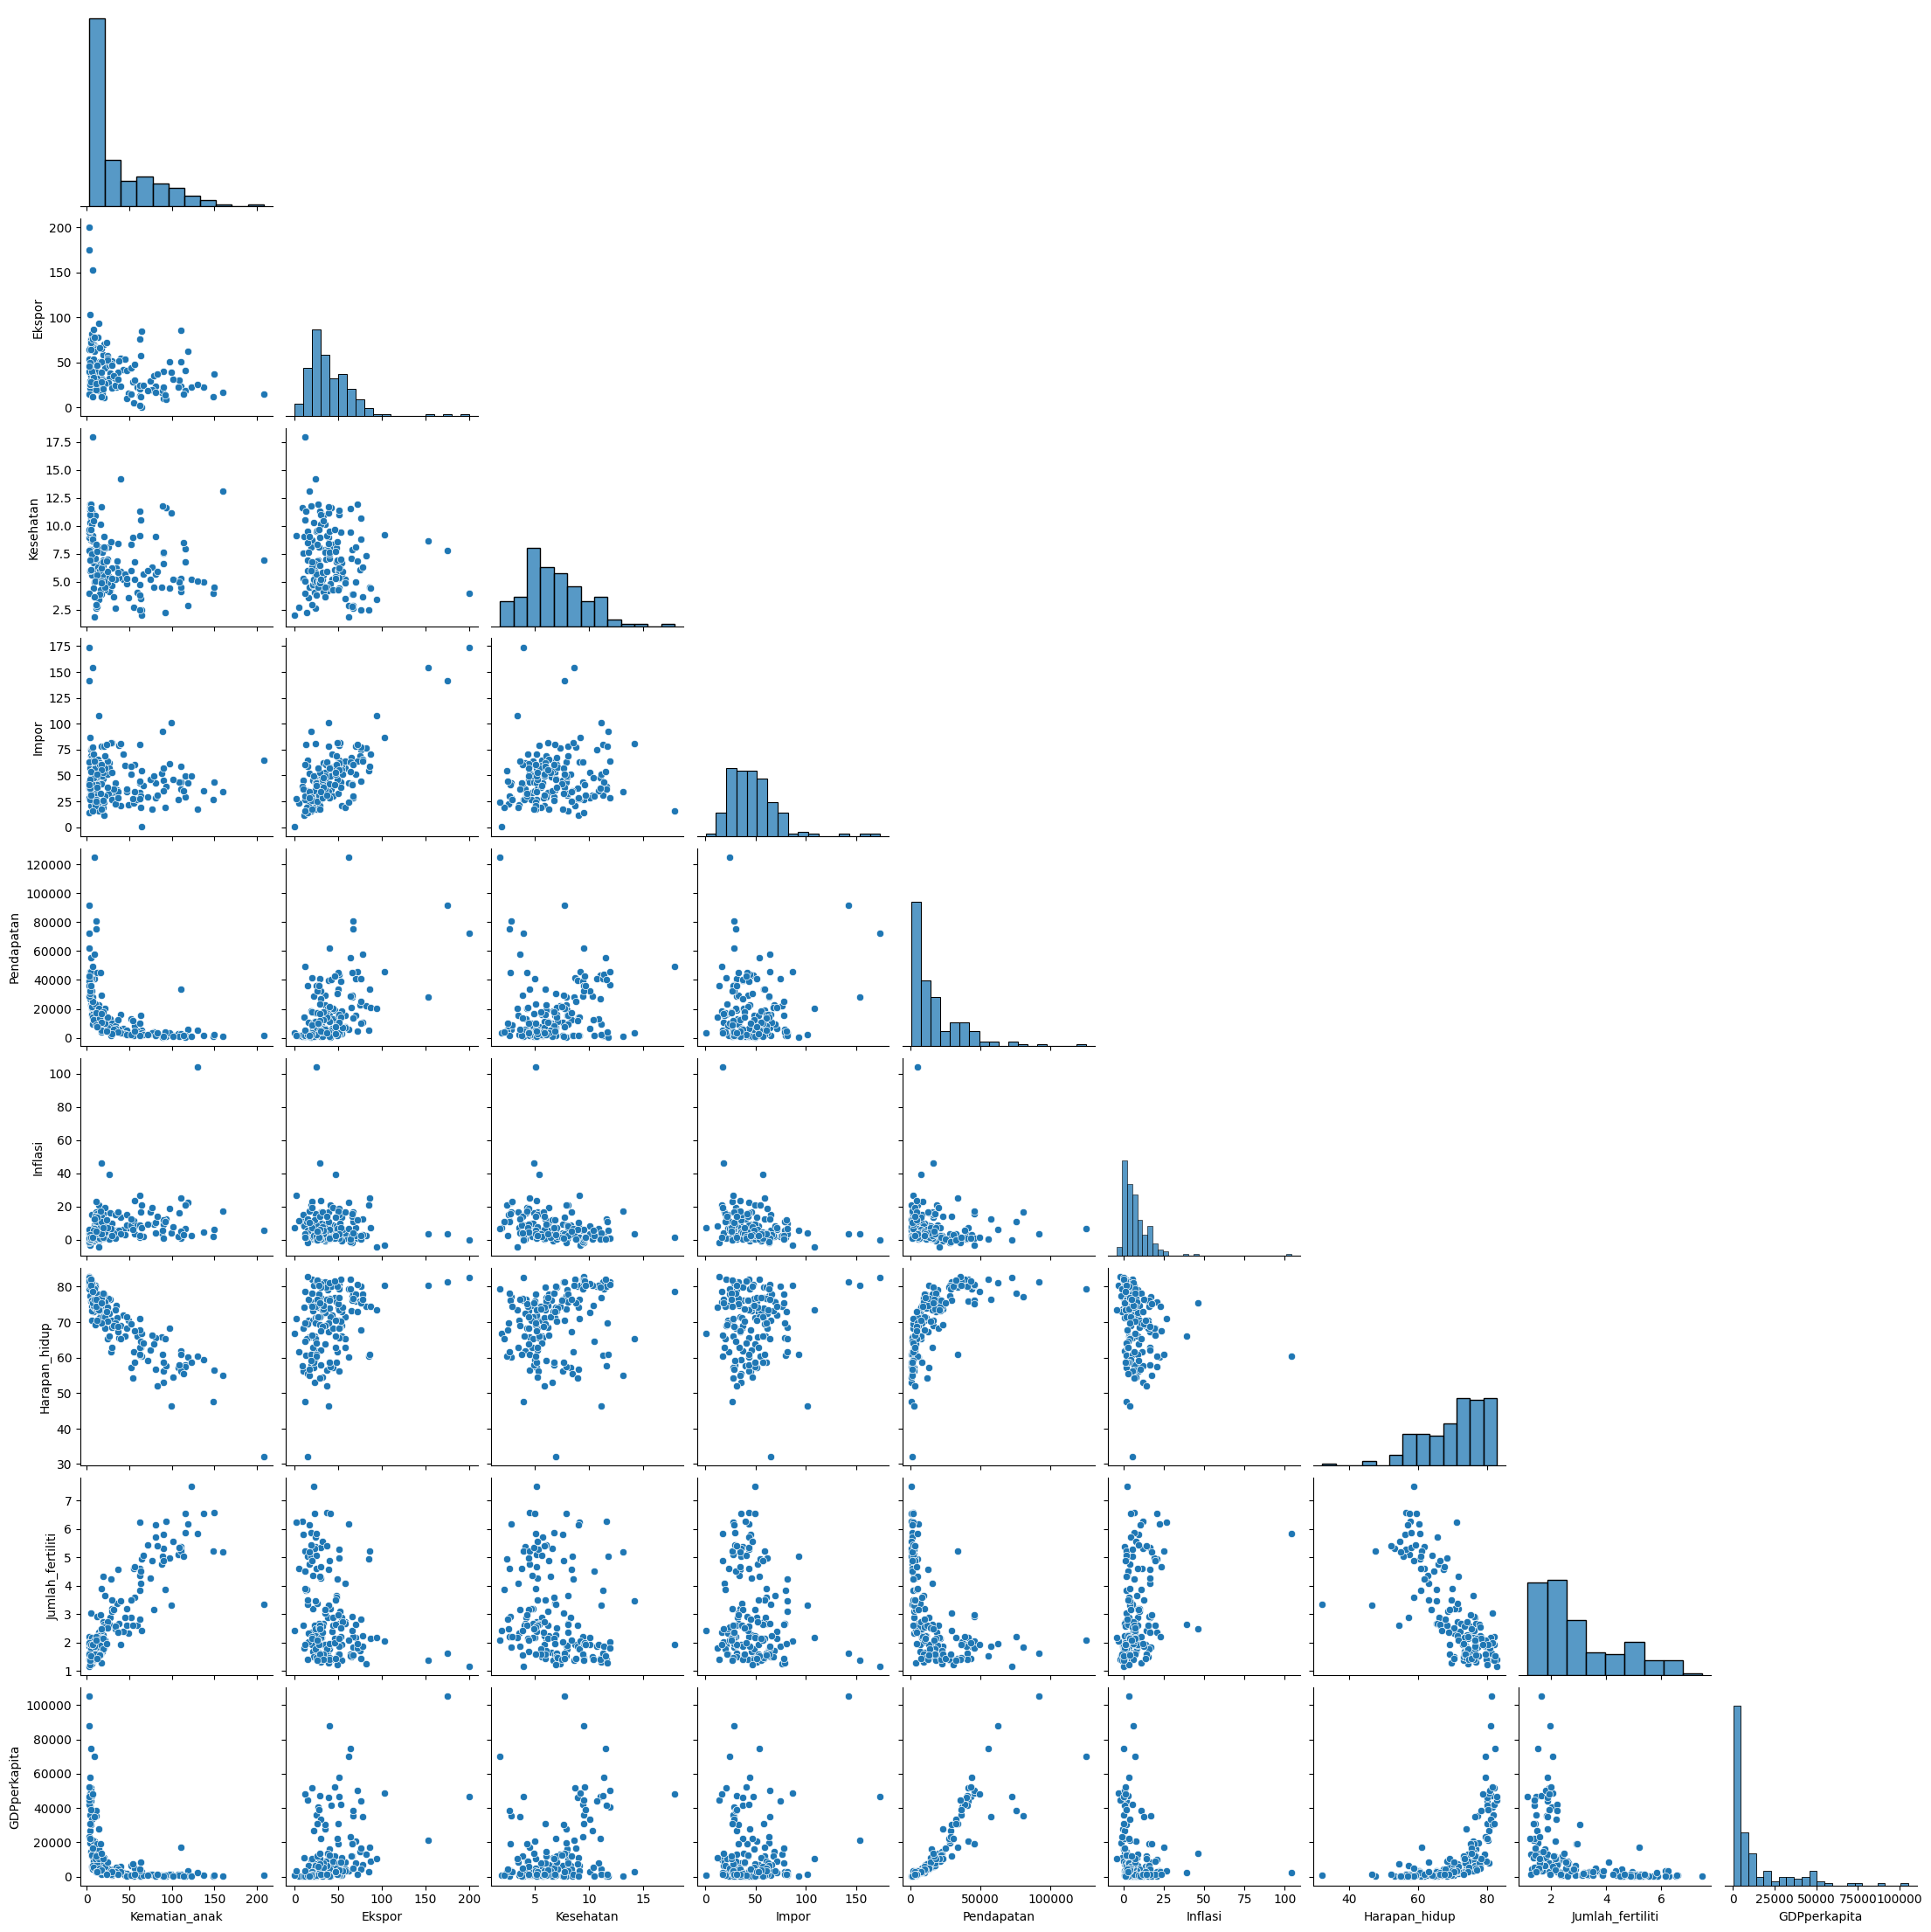

In [ ]:
#Melihat korelasi antara variable dan distribusi variable tersebut pada dataframe

df_korelasi = df.drop(columns=['Negara'])

# Membuat pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(df_korelasi, corner=True)
plt.show()


In [47]:
#negara dengan GDP terendah dan kematian anak tertinggi, persentil 10
persentil_kematian_anak = df['Kematian_anak'].quantile(0.90)
persentil_gdp = df['GDPperkapita'].quantile(0.10)

# Pilih baris dengan nilai kematian anak dan GDP di bawah atau sama dengan persentil ke-10
data_terendah_p10 = df[(df['Kematian_anak'] <= persentil_kematian_anak) & (df['GDPperkapita'] <= persentil_gdp)]

print("Data dengan kematian anak dan GDP terendah persentil ke-10:")
print(data_terendah_p10)



Data dengan kematian anak dan GDP terendah persentil ke-10:
          Negara  Kematian_anak  Ekspor  Kesehatan  Impor  Pendapatan  \
0    Afghanistan           90.2   10.00       7.58   44.9        1610   
26       Burundi           93.6    8.92      11.60   39.2         764   
50       Eritrea           55.2    4.79       2.66   23.3        1420   
56        Gambia           80.3   23.80       5.69   42.7        1660   
88       Liberia           89.3   19.10      11.80   92.6         700   
93    Madagascar           62.2   25.00       3.77   43.0        1390   
94        Malawi           90.5   22.80       6.59   34.9        1030   
109        Nepal           47.0    9.58       5.25   36.4        1990   
126       Rwanda           63.6   12.00      10.50   30.0        1350   
150         Togo           90.3   40.20       7.65   57.3        1210   

     Inflasi  Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
0       9.44           56.2              5.82           553  
26     12.30

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

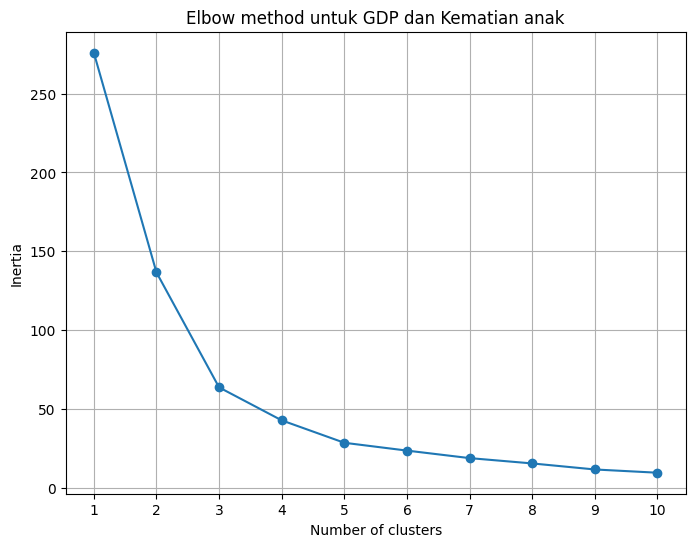

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

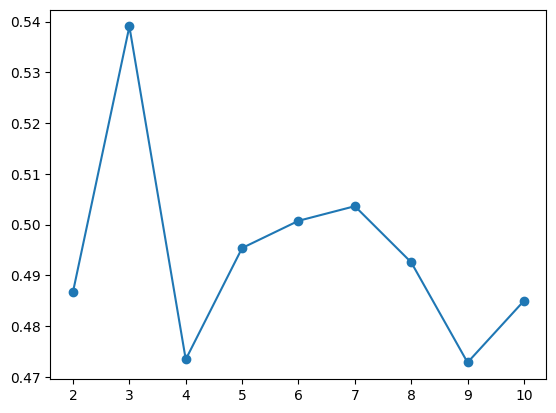

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


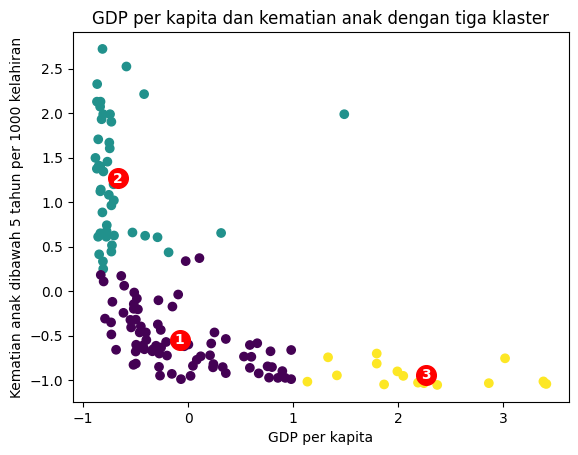

Cluster 0: ['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Nepal', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia', 'Samoa', 'Serbia', 'Seychelles', 'Solomon Islands', 'South Africa', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname', 'Thailand', 'Tonga', 'Tunisia', 'Turkey', 'Ukraine', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam']
Cluster 1: ['Afghanist

<ipython-input-40-2f39511a01ce>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A_after['Cluster'] = cluster_3


,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [40]:
#Clustering GDP vs Kematian anak

A = ['GDPperkapita', 'Kematian_anak']

#singkirkan outlier
Q1 = df[A].quantile(0.25)
Q3 = df[A].quantile(0.75)
IQR = Q3 - Q1

A_after = df[~((df[A] < (Q1 - 1.5 * IQR)) | (df[A] > (Q3 + 1.5 * IQR))).any(axis=1)]

scaler = StandardScaler()
A_scaled = scaler.fit_transform(A_after[A])


# Menyimpan inersia untuk berbagai nilai k
inertia = []

# Melakukan k-means clustering untuk nilai k antara 1 dan 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(A_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method untuk GDP dan Kematian anak')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Loop untuk mencari silhouette score untuk berbagai jumlah kluster
silhouette_scores = []
k_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k).fit(A_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(A_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    k_list.append(k)

plt.plot(k_list, silhouette_scores, marker='o')
plt.show()

# K=3 dipilih

kmeans_3 = KMeans(n_clusters=3)
cluster_3 = kmeans_3.fit_predict(A_scaled)
centers_3 = kmeans_3.cluster_centers_

plt.scatter(A_scaled[:, 0], A_scaled[:, 1], c=cluster_3, cmap='viridis')
plt.scatter(centers_3[:, 0], centers_3[:, 1], c='red', s=200, label='Centroids')
for i, center in enumerate(centers_3):
    circle = Circle((center[0], center[1]), 0.05, color='red', fill=False)
    plt.gca().add_patch(circle)
    plt.annotate(f'{i+1}', (center[0], center[1]), color='white', weight='bold', fontsize=10, ha='center', va='center')
plt.ylabel('Kematian anak dibawah 5 tahun per 1000 kelahiran')
plt.xlabel('GDP per kapita')
plt.title('GDP per kapita dan kematian anak dengan tiga klaster')
plt.show()

#nama negara dari setiap kluster
A_after['Cluster'] = cluster_3

# Grouping countries by cluster
cluster_groups = A_after.groupby('Cluster')['Negara'].apply(list)

# Print the countries in each cluster
for cluster, countries in cluster_groups.items():
    print(f'Cluster {cluster}: {countries}')
A_after.head()

Dari sini bisa dilihat

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

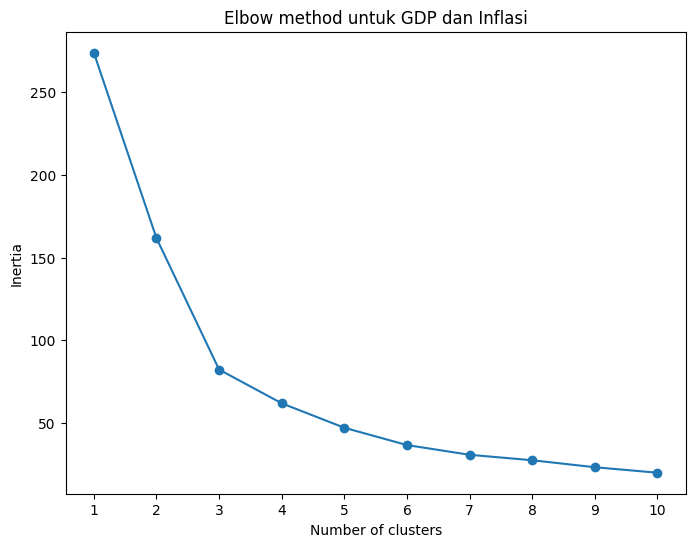

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

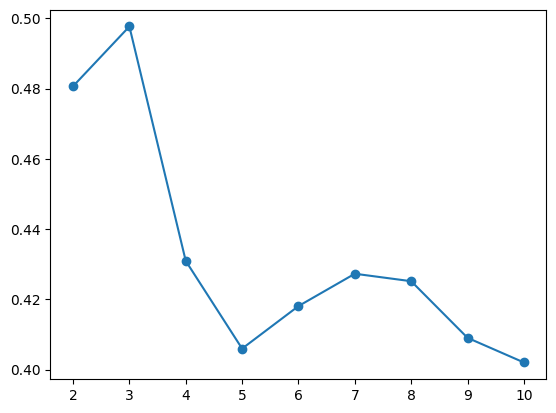

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


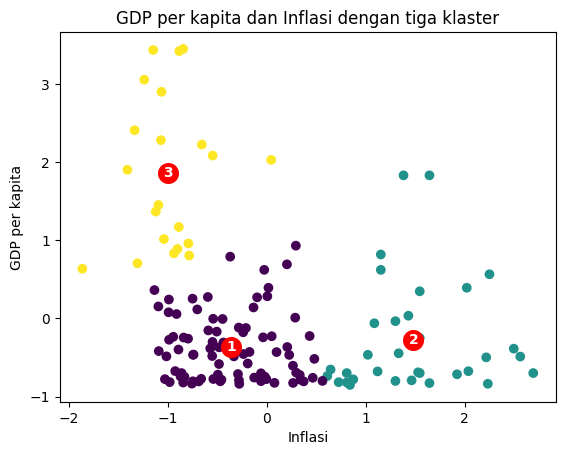

Cluster 0: ['Afghanistan', 'Albania', 'Armenia', 'Bangladesh', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica', "Cote d'Ivoire", 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Fiji', 'Gambia', 'Georgia', 'Grenada', 'Guatemala', 'Guinea-Bissau', 'Guyana', 'Haiti', 'India', 'Jamaica', 'Jordan', 'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Lebanon', 'Lesotho', 'Liberia', 'Macedonia, FYR', 'Madagascar', 'Malaysia', 'Maldives', 'Mali', 'Mauritius', 'Micronesia, Fed. Sts.', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Niger', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Romania', 'Rwanda', 'Samoa', 'Senegal', 'Serbia', 'Solomon Islands', 'South Africa', 'St. Vincent and the Grenadines', 'Suriname', 'Tanzania', 'Thailand', 'Togo', 'Tonga', 'Tunisia', 'Turkey', 'Turkmen

<ipython-input-48-859e53d3e1fc>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B_after['Cluster'] = cluster_3


In [48]:
#GDP dan Inflasi

B = ['Inflasi', 'GDPperkapita']

#singkirkan outlier
Q1 = df[B].quantile(0.25)
Q3 = df[B].quantile(0.75)
IQR = Q3 - Q1

B_after = df[~((df[B] < (Q1 - 1.5 * IQR)) | (df[B] > (Q3 + 1.5 * IQR))).any(axis=1)]

scaler = StandardScaler()
B_scaled = scaler.fit_transform(B_after[B])

# Menyimpan inersia untuk berbagai nilai k
inertia = []

# Melakukan k-means clustering untuk nilai k antara 1 dan 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(B_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method untuk GDP dan Inflasi')
plt.xticks(range(1, 11))
plt.show()

# Loop untuk mencari silhouette score untuk berbagai jumlah kluster
silhouette_scores = []
k_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k).fit(B_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(B_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    k_list.append(k)

plt.plot(k_list, silhouette_scores, marker='o')
plt.show()

# K=3 dipilih

kmeans_3 = KMeans(n_clusters=3)
cluster_3 = kmeans_3.fit_predict(B_scaled)
centers_3 = kmeans_3.cluster_centers_

plt.scatter(B_scaled[:, 0], B_scaled[:, 1], c=cluster_3, cmap='viridis')
plt.scatter(centers_3[:, 0], centers_3[:, 1], c='red', s=200, label='Centroids')
for i, center in enumerate(centers_3):
    circle = Circle((center[0], center[1]), 0.05, color='red', fill=False)
    plt.gca().add_patch(circle)
    plt.annotate(f'{i+1}', (center[0], center[1]), color='white', weight='bold', fontsize=10, ha='center', va='center')
plt.xlabel('Inflasi')
plt.ylabel('GDP per kapita')
plt.title('GDP per kapita dan Inflasi dengan tiga klaster')
plt.show()

#nama negara dari setiap kluster
B_after['Cluster'] = cluster_3

# Grouping countries by cluster
cluster_groups = B_after.groupby('Cluster')['Negara'].apply(list)

# Print the countries in each cluster
for cluster, countries in cluster_groups.items():
    print(f'Cluster {cluster}: {countries}')



Dari sini dapat dilihat:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

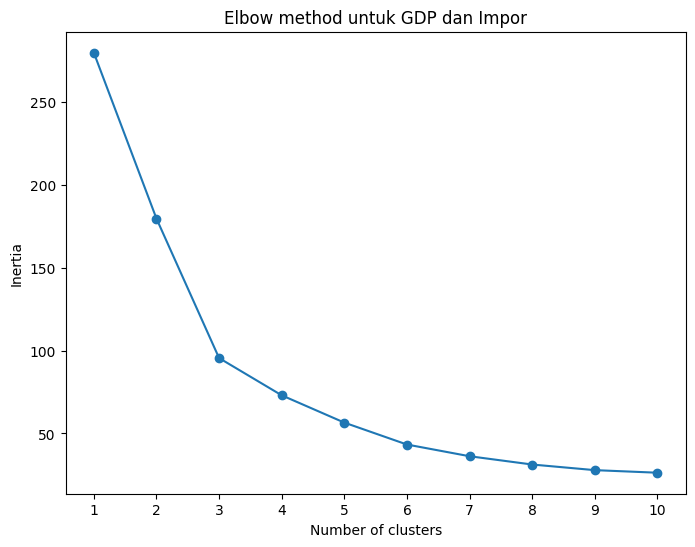

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

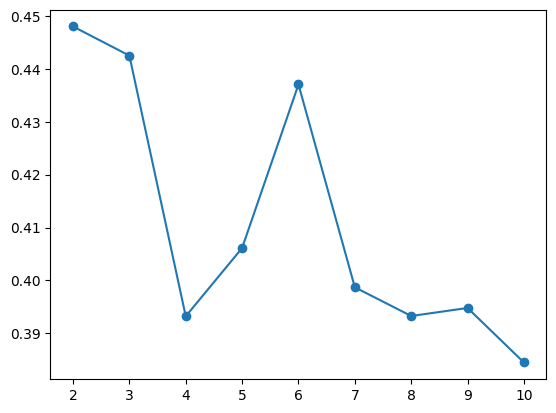

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


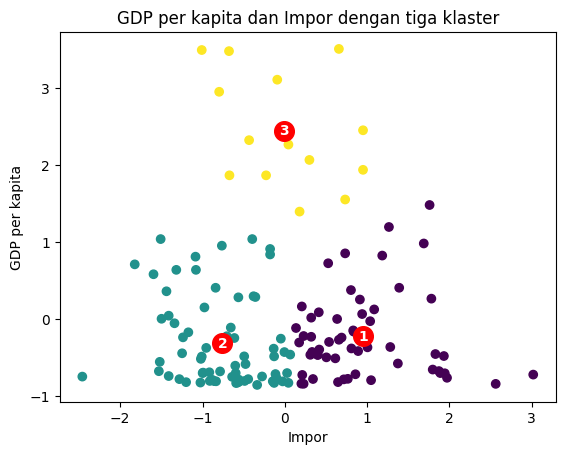

Cluster 0: ['Albania', 'Antigua and Barbuda', 'Belarus', 'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guyana', 'Haiti', 'Hungary', 'Jamaica', 'Jordan', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritania', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Namibia', 'Niger', 'Panama', 'Paraguay', 'Samoa', 'Serbia', 'Slovak Republic', 'Solomon Islands', 'St. Vincent and the Grenadines', 'Tajikistan', 'Thailand', 'Togo', 'Tonga', 'Tunisia', 'Ukraine', 'Vanuatu', 'Vietnam']
Cluster 1: ['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Benin', 'Bolivia', 'Brazil', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Costa Rica', "Cote d'Ivoire"

<ipython-input-41-41db5f1243fa>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C_after['Cluster'] = cluster_3


In [41]:
#GDP dan impor

C = ['Impor', 'GDPperkapita']

#singkirkan outlier
Q1 = df[C].quantile(0.25)
Q3 = df[C].quantile(0.75)
IQR = Q3 - Q1

C_after = df[~((df[C] < (Q1 - 1.5 * IQR)) | (df[C] > (Q3 + 1.5 * IQR))).any(axis=1)]

scaler = StandardScaler()
C_scaled = scaler.fit_transform(C_after[C])

# Menyimpan inersia untuk berbagai nilai k
inertia = []

# Melakukan k-means clustering untuk nilai k antara 1 dan 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(C_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method untuk GDP dan Impor')
plt.xticks(range(1, 11))
plt.show()

# Loop untuk mencari silhouette score untuk berbagai jumlah kluster
silhouette_scores = []
k_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k).fit(C_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(C_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    k_list.append(k)

plt.plot(k_list, silhouette_scores, marker='o')
plt.show()

# K=3 dipilih

kmeans_3 = KMeans(n_clusters=3)
cluster_3 = kmeans_3.fit_predict(C_scaled)
centers_3 = kmeans_3.cluster_centers_

plt.scatter(C_scaled[:, 0], C_scaled[:, 1], c=cluster_3, cmap='viridis')
plt.scatter(centers_3[:, 0], centers_3[:, 1], c='red', s=200, label='Centroids')
for i, center in enumerate(centers_3):
    circle = Circle((center[0], center[1]), 0.05, color='red', fill=False)
    plt.gca().add_patch(circle)
    plt.annotate(f'{i+1}', (center[0], center[1]), color='white', weight='bold', fontsize=10, ha='center', va='center')
plt.xlabel('Impor')
plt.ylabel('GDP per kapita')
plt.title('GDP per kapita dan Impor dengan tiga klaster')
plt.show()

#nama negara dari setiap kluster
C_after['Cluster'] = cluster_3

# Grouping countries by cluster
cluster_groups = C_after.groupby('Cluster')['Negara'].apply(list)

# Print the countries in each cluster
for cluster, countries in cluster_groups.items():
    print(f'Cluster {cluster}: {countries}')


Dari sini dapat dilihat:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

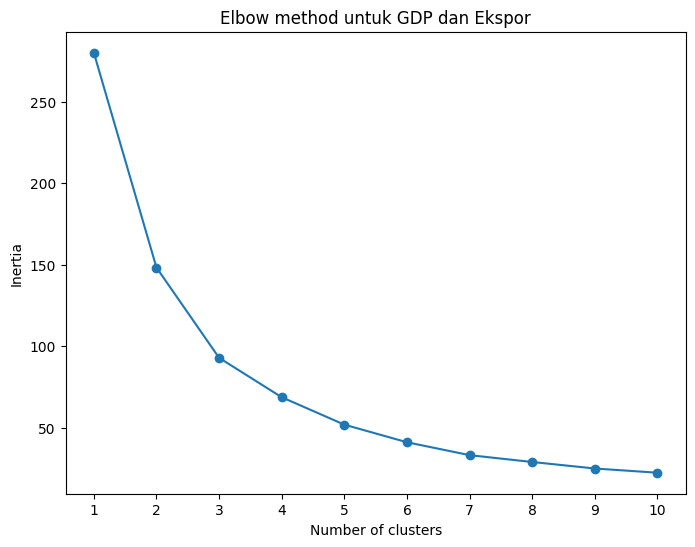

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

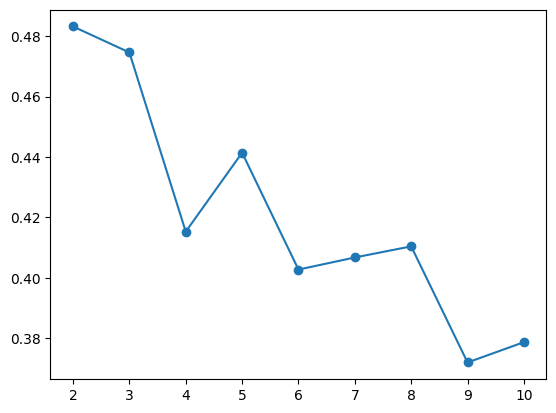

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


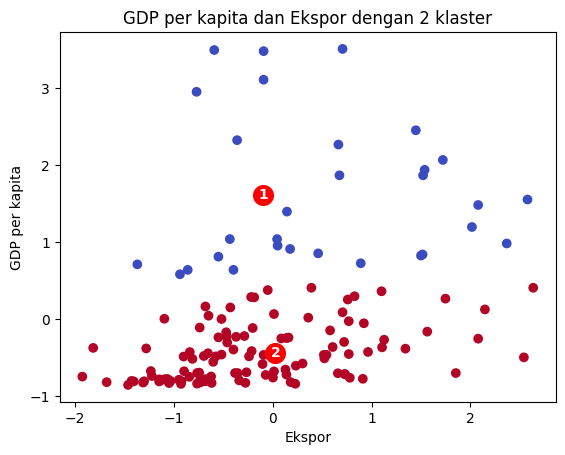

Cluster 0: ['Antigua and Barbuda', 'Argentina', 'Bahamas', 'Bahrain', 'Barbados', 'Brazil', 'Chile', 'Croatia', 'Cyprus', 'Czech Republic', 'Equatorial Guinea', 'Estonia', 'Greece', 'Hungary', 'Israel', 'Latvia', 'Libya', 'Lithuania', 'Oman', 'Poland', 'Portugal', 'Russia', 'Saudi Arabia', 'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Turkey', 'Uruguay', 'Venezuela']
Cluster 1: ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'India', 'Indonesia', 'Iran', 'Iraq',

<ipython-input-43-95b37b3f60c8>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D_after['Cluster'] = cluster_2


In [43]:
#GDP dan ekspor
D = ['Ekspor', 'GDPperkapita']

#singkirkan outlier
Q1 = df[D].quantile(0.25)
Q3 = df[D].quantile(0.75)
IQR = Q3 - Q1

D_after = df[~((df[D] < (Q1 - 1.5 * IQR)) | (df[D] > (Q3 + 1.5 * IQR))).any(axis=1)]

scaler = StandardScaler()
D_scaled = scaler.fit_transform(D_after[D])

# Menyimpan inersia untuk berbagai nilai k
inertia = []

# Melakukan k-means clustering untuk nilai k antara 1 dan 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(D_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method untuk GDP dan Ekspor')
plt.xticks(range(1, 11))
plt.show()

# Loop untuk mencari silhouette score untuk berbagai jumlah kluster
silhouette_scores = []
k_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k).fit(D_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(D_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    k_list.append(k)

plt.plot(k_list, silhouette_scores, marker='o')
plt.show()

#K=2 dipilih

kmeans_2 = KMeans(n_clusters=2)
cluster_2 = kmeans_2.fit_predict(C_scaled)
centers_2 = kmeans_2.cluster_centers_

plt.scatter(D_scaled[:, 0], D_scaled[:, 1], c=cluster_2, cmap='coolwarm')
plt.scatter(centers_2[:, 0], centers_2[:, 1], c='red', s=200, label='Centroids')
for i, center in enumerate(centers_2):
    circle = Circle((center[0], center[1]), 0.05, color='red', fill=False)
    plt.gca().add_patch(circle)
    plt.annotate(f'{i+1}', (center[0], center[1]), color='white', weight='bold', fontsize=10, ha='center', va='center')
plt.xlabel('Ekspor')
plt.ylabel('GDP per kapita')
plt.title('GDP per kapita dan Ekspor dengan 2 klaster')
plt.show()

#nama negara dari setiap kluster
D_after['Cluster'] = cluster_2

# Grouping countries by cluster
cluster_groups = D_after.groupby('Cluster')['Negara'].apply(list)

# Print the countries in each cluster
for cluster, countries in cluster_groups.items():
    print(f'Cluster {cluster}: {countries}')


Dari sini dapat dilihat

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

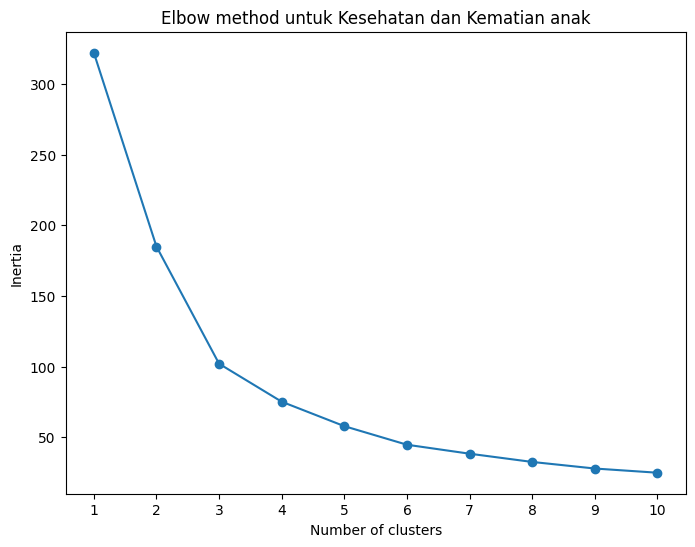

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

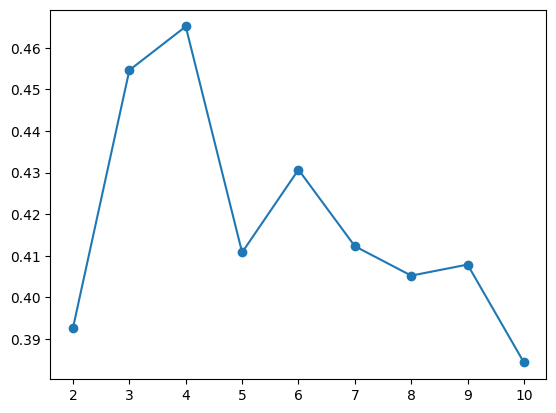

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


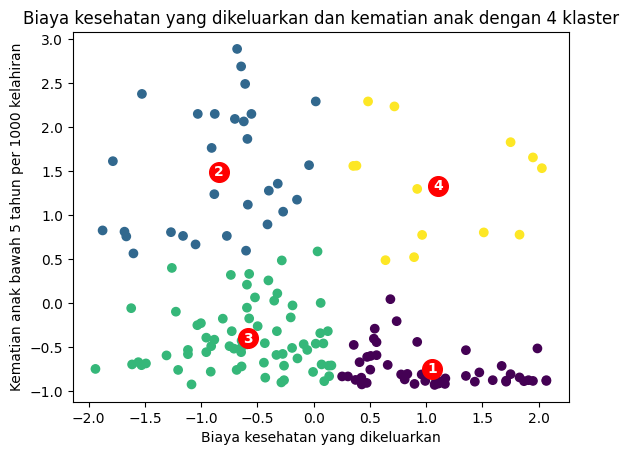

Cluster 0: ['Argentina', 'Australia', 'Austria', 'Bahamas', 'Barbados', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Ecuador', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Luxembourg', 'Malta', 'Moldova', 'Montenegro', 'Netherlands', 'New Zealand', 'Norway', 'Panama', 'Poland', 'Portugal', 'Serbia', 'Slovak Republic', 'Slovenia', 'Solomon Islands', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Uruguay']
Cluster 1: ['Angola', 'Benin', 'Burkina Faso', 'Cameroon', 'Comoros', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'India', 'Kenya', 'Lao', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Niger', 'Nigeria', 'Pakistan', 'Senegal', 'Sudan', 'Tanzania', 'Turkmenistan', 'Yemen', 'Zambia']
Cluster 2: ['Albania', 'Algeria'

<ipython-input-49-a4bb88f2fdc5>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E_after['Cluster'] = cluster_4


In [49]:
#Kematian anak dan biaya kesehatan yang dikeluarkan
E = ['Kesehatan', 'Kematian_anak']

#singkirkan outlier
Q1 = df[E].quantile(0.25)
Q3 = df[E].quantile(0.75)
IQR = Q3 - Q1

E_after = df[~((df[E] < (Q1 - 1.5 * IQR)) | (df[E] > (Q3 + 1.5 * IQR))).any(axis=1)]

scaler = StandardScaler()
E_scaled = scaler.fit_transform(E_after[E])

# Menyimpan inersia untuk berbagai nilai k
inertia = []

# Melakukan k-means clustering untuk nilai k antara 1 dan 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(E_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method untuk Kesehatan dan Kematian anak')
plt.xticks(range(1, 11))
plt.show()

# Loop untuk mencari silhouette score untuk berbagai jumlah kluster
silhouette_scores = []
k_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k).fit(E_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(E_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    k_list.append(k)

plt.plot(k_list, silhouette_scores, marker='o')
plt.show()

#k=4 dipilih

kmeans_4 = KMeans(n_clusters=4)
cluster_4 = kmeans_4.fit_predict(E_scaled)
centers_4 = kmeans_4.cluster_centers_

plt.scatter(E_scaled[:, 0], E_scaled[:, 1], c=cluster_4, cmap='viridis')
plt.scatter(centers_4[:, 0], centers_4[:, 1], c='red', s=200, label='Centroids')
for i, center in enumerate(centers_4):
    circle = Circle((center[0], center[1]), 0.05, color='red', fill=False)
    plt.gca().add_patch(circle)
    plt.annotate(f'{i+1}', (center[0], center[1]), color='white', weight='bold', fontsize=10, ha='center', va='center')
plt.xlabel('Biaya kesehatan yang dikeluarkan')
plt.ylabel('Kematian anak bawah 5 tahun per 1000 kelahiran')
plt.title('Biaya kesehatan yang dikeluarkan dan kematian anak dengan 4 klaster')
plt.show()

#nama negara dari setiap kluster
E_after['Cluster'] = cluster_4

# Grouping countries by cluster
cluster_groups = E_after.groupby('Cluster')['Negara'].apply(list)

# Print the countries in each cluster
for cluster, countries in cluster_groups.items():
    print(f'Cluster {cluster}: {countries}')




In [62]:
#negara yang beradapada irisan klaster yang direkomendasi
kesehatan = ['Angola', 'Benin', 'Burkina Faso', 'Cameroon', 'Comoros', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'India', 'Kenya', 'Lao', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Niger', 'Nigeria', 'Pakistan', 'Senegal', 'Sudan', 'Tanzania', 'Turkmenistan', 'Yemen', 'Zambia']
ekspor = ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'India', 'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Lebanon', 'Lesotho', 'Liberia', 'Macedonia, FYR', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Mauritania', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Romania', 'Rwanda', 'Samoa', 'Senegal', 'Serbia', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Sudan', 'Suriname', 'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Tunisia', 'Turkmenistan', 'Uganda', 'Ukraine', 'Uzbekistan', 'Vanuatu', 'Vietnam', 'Yemen', 'Zambia']
impor = ['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Benin', 'Bolivia', 'Brazil', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'India', 'Indonesia', 'Iran', 'Iraq', 'Kazakhstan', 'Kenya', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Morocco', 'Mozambique', 'Myanmar', 'Nepal', 'Nigeria', 'Pakistan', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sri Lanka', 'Sudan', 'Suriname', 'Tanzania', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'Uganda', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Yemen', 'Zambia']
inflasi = ['Afghanistan', 'Albania', 'Armenia', 'Bangladesh', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica', "Cote d'Ivoire", 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Fiji', 'Gambia', 'Georgia', 'Grenada', 'Guatemala', 'Guinea-Bissau', 'Guyana', 'Haiti', 'India', 'Jamaica', 'Jordan', 'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Lebanon', 'Lesotho', 'Liberia', 'Macedonia, FYR', 'Madagascar', 'Malaysia', 'Maldives', 'Mali', 'Mauritius', 'Micronesia, Fed. Sts.', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Niger', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Romania', 'Rwanda', 'Samoa', 'Senegal', 'Serbia', 'Solomon Islands', 'South Africa', 'St. Vincent and the Grenadines', 'Suriname', 'Tanzania', 'Thailand', 'Togo', 'Tonga', 'Tunisia', 'Turkey', 'Turkmenistan', 'Uganda', 'Uruguay', 'Vanuatu']
gdp_kematian = ['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'India', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Turkmenistan', 'Uganda', 'Yemen', 'Zambia']

irisan_negara = set(kesehatan) & set(ekspor) & set(impor) & set(inflasi) & set(gdp_kematian)

# Menampilkan hasil
print("Negara yang berada pada irisan semua daftar:", irisan_negara)

Negara yang berada pada irisan semua daftar: {'Kenya', 'Cameroon', 'Madagascar', 'Mali', 'Turkmenistan', 'Tanzania', "Cote d'Ivoire", 'Burkina Faso', 'Mozambique', 'Senegal', 'Gambia', 'India', 'Myanmar', 'Benin'}
